## 

# Tuning Curves Playground Notebook

In [102]:

## Import Libraries:
# Mathematical / Numerical Libraries:
import numpy as np
import random

# Plotting:
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib inline  # use %matplotlib tk to get a popout window, requires PyQt5

# Type hinting:
from typing import List, Union, Tuple, Callable

# make numpy warnings act as errors:
np.seterr(all='raise')


{'divide': 'raise', 'over': 'raise', 'under': 'raise', 'invalid': 'raise'}

## 1-D Gaussian Tuning Function

In [103]:
def gaussian(x: np.ndarray, mu: float, sigma: float) -> np.ndarray:
    """Creates a simple 1 dimensional Gaussian probability distribution

    Args:
        x (np.ndarray): A numpy array of points to evaluate the distribution at
        mu (float): The mean (centre point) of the distribution
        sigma (float): The stdev of the gaussian distribution

    Returns:
        np.ndarray: A numpy array representing the gaussian distribution evaluated at the input points x
    """
    return (np.exp(-((x - mu)**2) / (2 * sigma**2))) / (np.sqrt(2 *  np.pi) * sigma)


def gaussian_tuning_function(x: np.ndarray, mu: float, sigma: float, maxResponse: float=1, minResponse: float=0) -> np.ndarray:
    """Creates a shifted scaled Gaussian distribution

    Args:
        x (np.ndarray): A numpy array of points to evaluate at
        mu (float): The centre point of the distribution
        sigma (float): The stdev of the distribution
        maxResponse (float, optional): The maximum value of the response function. Defaults to 1.
        minResponse (float, optional): The minimum value of the response function. Defaults to 0.

    Returns:
        np.ndarray: A numpy array representing the gaussian distribution evaluated at the input points x
    """
    # compute gaussian PDF based on input:
    dist = gaussian(x, mu, sigma)
    
    # scale + shift to match min and max response range:
    dist = (dist/max(dist)) * (maxResponse - minResponse) + minResponse
    
    return dist


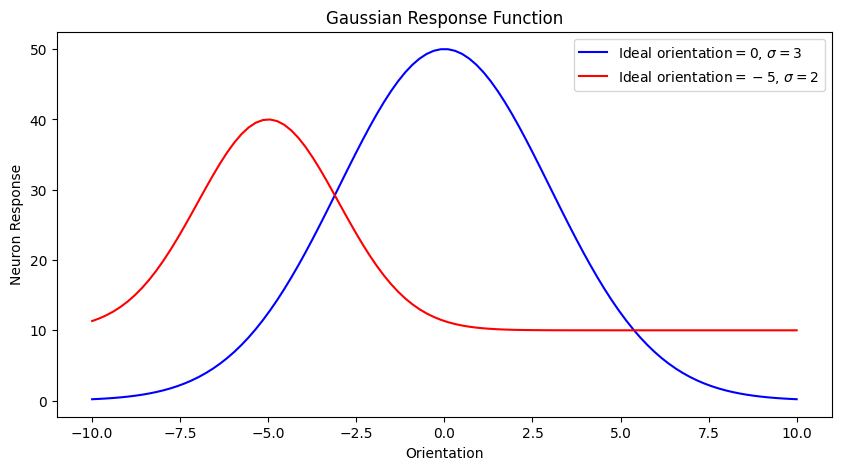

In [104]:
# Example for how this might represent the response of an individual neuron:
x: np.ndarray = np.linspace(-10, 10, 100)
maxResponse: int = 50
minResponse: int = 0
correctOrientation1: int = 0
stdev1: int = 3
response1: np.ndarray = gaussian_tuning_function(x, correctOrientation1, stdev1, maxResponse, minResponse)

maxResponse = 40
minResponse = 10
correctOrientation2 = -5
stdev2: int = 2
response2: np.ndarray = gaussian_tuning_function(x, correctOrientation2, stdev2, maxResponse, minResponse)


# plotting the output:
fig: plt.Figure = plt.figure(figsize=(10,5))
plt.plot(x, response1, '-', color="blue", label=fr"Ideal orientation$= {correctOrientation1}$, $\sigma={stdev1}$")
plt.plot(x, response2, '-', color="red", label=fr"Ideal orientation$= {correctOrientation2}$, $\sigma={stdev2}$")
plt.xlabel(r"Orientation")
plt.ylabel(r"Neuron Response")
plt.title(r"Gaussian Response Function")
plt.legend()
plt.show()

## Sigmoid Tuning Function

In [105]:
def sigmoid_tuning(x: np.ndarray, steepness: float, pivot: float, maxResponse: float=0, minResponse: float=1) -> np.ndarray:
    """Creates a shifted scaled Sigmoid distribution

    Args:
        x (np.ndarray): A numpy array of points to evaluate at
        steepness (float): The steepness of the step
        pivot (float): The pivot point (point at which the distribution is centred at)
        maxResponse (float, optional): The maximum value of the response function. Defaults to 1.
        minResponse (float, optional): The minimum value of the response function. Defaults to 0.

    Returns:
        np.ndarray: A numpy array representing the sigmoid distribution evaluated at the input points x
    """
    # create initial distribution:
    dist: np.ndarray =  1 / (1 + np.exp(-steepness * (x - pivot)))
    
    # scale + shift to match min and max response range:
    dist = (dist/max(dist)) * (maxResponse - minResponse) + minResponse
    
    return dist

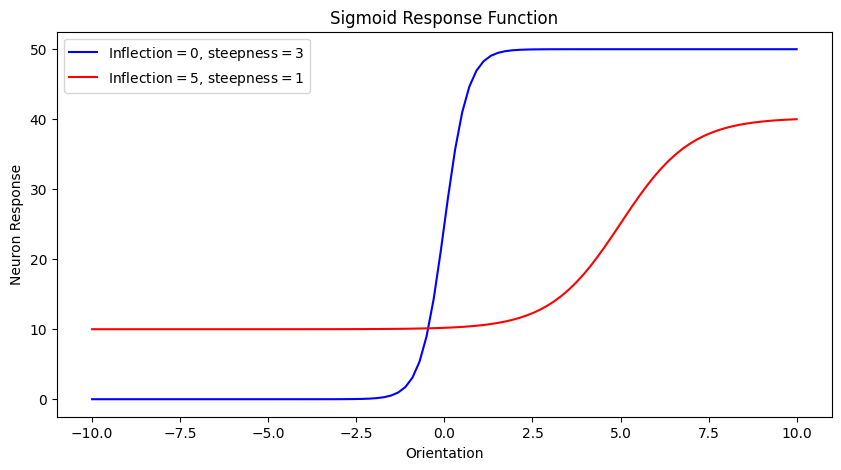

In [106]:
# Example for how this might represent the response of an individual neuron:
x: np.ndarray = np.linspace(-10, 10, 100)
maxResponse: int = 50
minResponse: int = 0
pivotPoint1: int = 0
steepness1: int = 3
response1: np.ndarray = sigmoid_tuning(x, steepness1, pivotPoint1, maxResponse, minResponse)

maxResponse: int = 40
minResponse: int = 10
pivotPoint2: int = 5
steepness2: int = 1
response2: np.ndarray = sigmoid_tuning(x, steepness2, pivotPoint2, maxResponse, minResponse)


# plotting the output:
fig: plt.Figure = plt.figure(figsize=(10,5))
plt.plot(x, response1, '-', color="blue", label=fr"Inflection$= {pivotPoint1}$, steepness$={steepness1}$")
plt.plot(x, response2, '-', color="red", label=fr"Inflection$= {pivotPoint2}$, steepness$={steepness2}$")
plt.xlabel(r"Orientation")
plt.ylabel(r"Neuron Response")
plt.title(r"Sigmoid Response Function")
plt.legend()
plt.show()

# Von-Mises Tuning Curve

In [107]:
def von_mises_tuning_function(x: np.ndarray, kappa: float, theta: float, maxResponse: float=1, minResponse: float=0) -> np.ndarray:
    """Creates a shifted scaled von-mises distribution

    Args:
        x (np.ndarray): A numpy array of points to evaluate at
        kappa (float): The concentration parameter
        theta (float): The ideal angle (with maximum response)
        maxResponse (float, optional): The maximum value of the response function. Defaults to 1.
        minResponse (float, optional): The minimum value of the response function. Defaults to 0.

    Returns:
        np.ndarray: A numpy array representing the von-mises distribution evaluated at the input points x
    """
    # compute von-mises PDF based on input:
    dist = np.exp(kappa * np.cos(x - theta)) / (2 * np.pi * np.sinh(kappa))
    
    # scale + shift to match min and max response range:
    dist = (dist/max(dist)) * (maxResponse - minResponse) + minResponse
    
    return dist


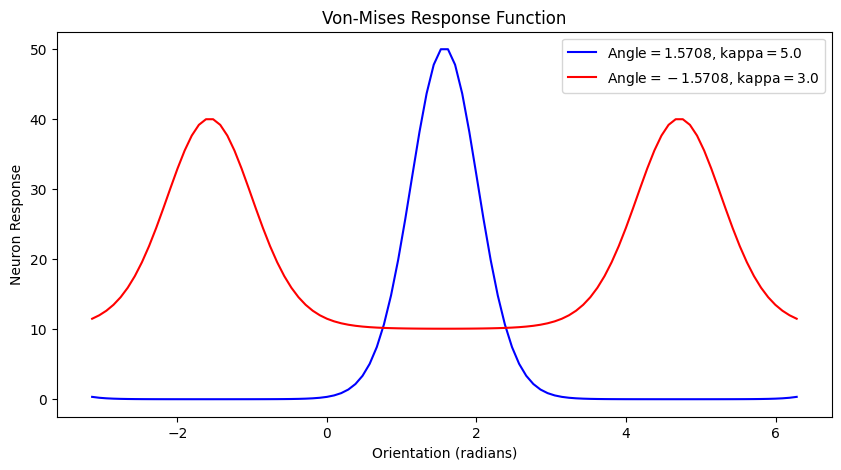

In [108]:
# Example for how this might represent the response of an individual neuron:
x: np.ndarray = np.linspace(-np.pi, 2*np.pi, 100)
maxResponse: int = 50
minResponse: int = 0
idealAngle1: float = np.pi / 2
kappa1: float = 5.0
response1: np.ndarray = von_mises_tuning_function(x, kappa1, idealAngle1, maxResponse, minResponse)

maxResponse: int = 40
minResponse: int = 10
idealAngle2: float = -np.pi / 2
kappa2: float = 3.0
response2: np.ndarray = von_mises_tuning_function(x, kappa2, idealAngle2, maxResponse, minResponse)


# plotting the output:
fig: plt.Figure = plt.figure(figsize=(10,5))
plt.plot(x, response1, '-', color="blue", label=fr"Angle$= {idealAngle1:.4f}$, kappa$={kappa1}$")
plt.plot(x, response2, '-', color="red", label=fr"Angle$= {idealAngle2:.4f}$, kappa$={kappa2}$")
plt.xlabel(r"Orientation (radians)")
plt.ylabel(r"Neuron Response")
plt.title(r"Von-Mises Response Function")
plt.legend()
plt.show()

# Plotting Representational Dissimilarity Matrix

In [109]:
def compute_RDM(curves: List[np.ndarray]) -> np.ndarray:
    n: int = len(curves)
    
    rdm: np.ndarray = np.zeros((n,n))
    
    for i in range(n):
        for j in range(i+1, n):
            rdm[i,j] = rdm[j,i] = 1 - np.corrcoef(curves[i], curves[j])[0, 1] #! this dissimilarity metric might not be the ideal one to use in all scenarios
    return rdm

In [110]:
def plot_rdm(rdm: np.ndarray, labels: Union[List[str], None]=None, cmap: str='viridis', title: str=None) -> None:
    title = 'RDM of Tuning Curves' if title is None else title
    fig: plt.Figure = plt.figure(figsize=(10,5))
    
    plt.imshow(rdm, cmap=cmap)
    plt.colorbar(label='Dissimilarity')
    plt.title(title)
    
    if labels is not None:
        plt.xticks(range(len(labels)), labels, rotation=75, ha='left')
        plt.yticks(range(len(labels)), labels)
    plt.show()

In [111]:
# Generating multiple curves:
curves: List[np.ndarray] = []
x: np.ndarray = np.linspace(-10, 10, 100)
maxResponse: int = 50
minResponse: int = 0
correctOrientation: int = 0
stdev: int = 1
idealResponse: np.ndarray = gaussian_tuning_function(x, correctOrientation, stdev, maxResponse, minResponse)

for orientation in np.linspace(-5, 5, 50):
    curves.append(gaussian_tuning_function(x, orientation, stdev, maxResponse, minResponse))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


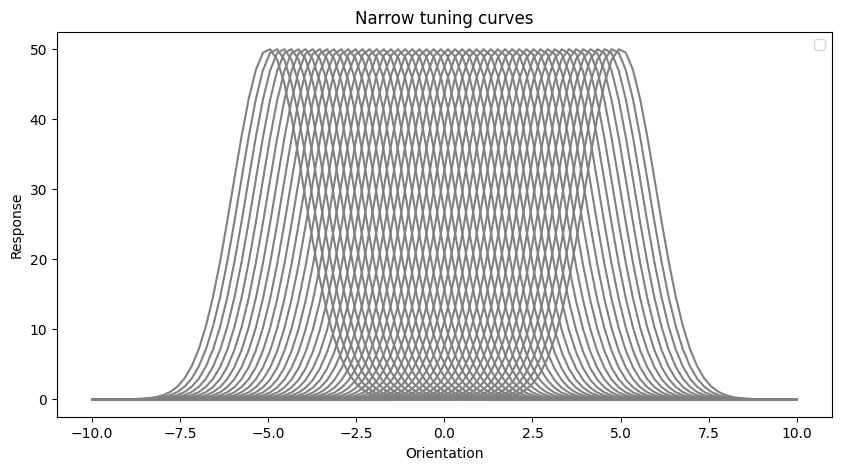

In [112]:
# Plot each of the curves:
fig: plt.Figure = plt.figure(figsize=(10,5))
for curve in curves:
    plt.plot(x, curve, '-', color="gray")
# plt.plot(x, idealResponse, '-', color="black", label=r"Ideal orientation")
plt.xlabel(r"Orientation")
plt.ylabel(r"Response")
plt.title(r"Narrow tuning curves")
plt.legend()
plt.show()

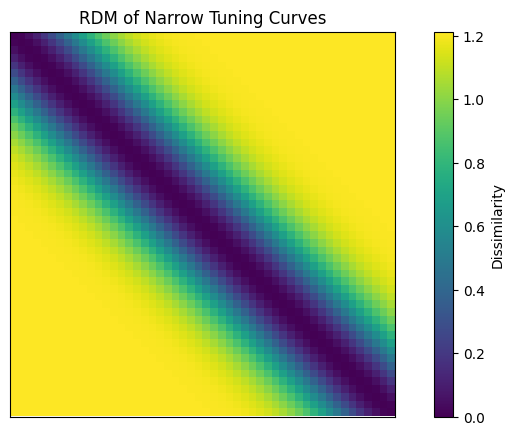

In [113]:
# Compute the RDM Matrix:
rdm = compute_RDM(curves)
plot_rdm(rdm, labels=[], title="RDM of Narrow Tuning Curves")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


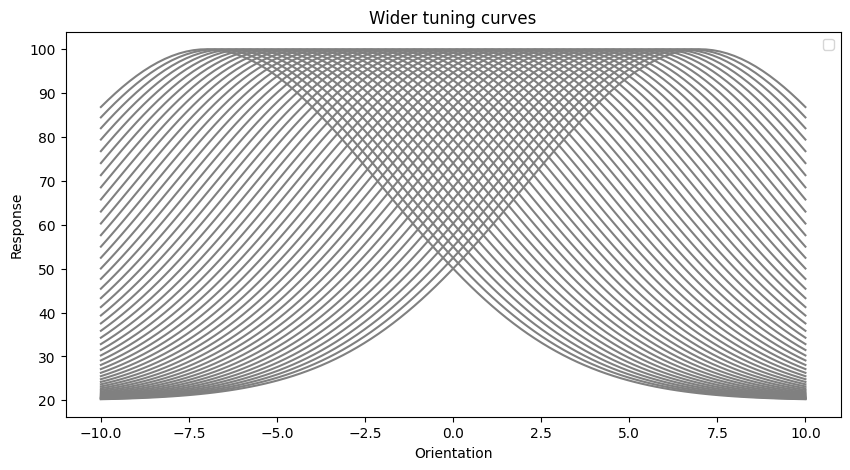

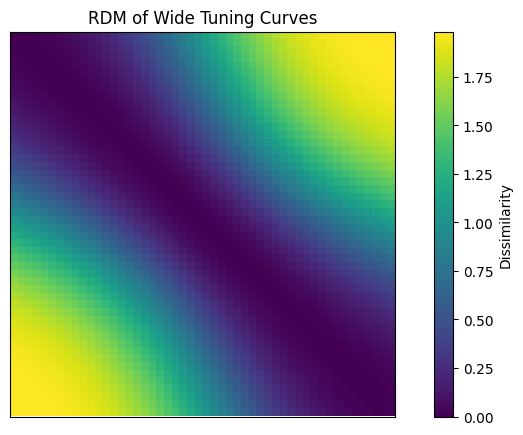

In [114]:
## Example using labels:
# generate curves:
curves: List[np.ndarray] = []
labels: List[str] = []
x: np.ndarray = np.linspace(-10, 10, 100)
maxResponse: int = 100
minResponse: int = 20
correctOrientation: int = 3
stdev: int = 5
idealResponse: np.ndarray = gaussian_tuning_function(x, correctOrientation, stdev, maxResponse, minResponse)

for orientation in np.linspace(-7, 7, 50):
    curves.append(gaussian_tuning_function(x, orientation, stdev, maxResponse, minResponse))
    labels.append(str(orientation))

# plot tuning curves:
fig: plt.Figure = plt.figure(figsize=(10,5))
for curve in curves: plt.plot(x, curve, '-', color="gray")
# plt.plot(x, idealResponse, '-', color="black", label=r"Ideal orientation")
plt.xlabel(r"Orientation")
plt.ylabel(r"Response")
plt.title(r"Wider tuning curves")
plt.legend()
plt.show()

# plot RDM:
# plot_rdm(compute_RDM(curves), cmap='magma', labels=labels)
plot_rdm(compute_RDM(curves), labels=[], title="RDM of Wide Tuning Curves")

## RDM of Sigmoid Curves

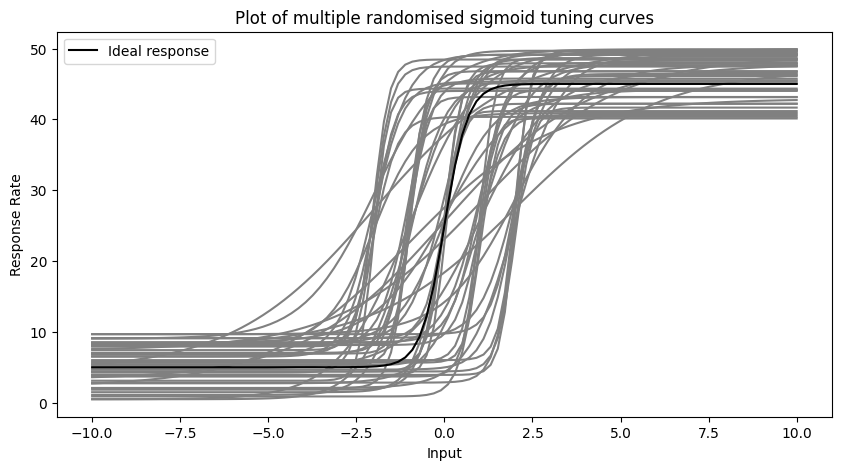

In [115]:
# Generating multiple curves:
curves: List[np.ndarray] = []
x: np.ndarray = np.linspace(-10, 10, 100)
maxResponse: int = 50
minResponse: int = 0
correctOrientation: int = 0
stdev: int = 1


x: np.ndarray = np.linspace(-10, 10, 100)

# Setting the ranges for each parameter of the sigmoid curve
minResponseRange: Tuple[int] = (0, 10)
maxResponseRange: Tuple[int] = (40, 50)
pivotPointRange: Tuple[int] = (-2, 2)
steepnessRange: Tuple[int] = (0.5, 5)

# Generate the ideal response:
idealResponse: np.ndarray = sigmoid_tuning(x, 3, 0, 45, 5)

# Generate random sigmoids with parameters in specified ranges
for steepness in np.linspace(steepnessRange[0], steepnessRange[1], 10):
    for pivot in np.linspace(pivotPointRange[0], pivotPointRange[1], 5):
        curves.append(sigmoid_tuning(
            x, 
            steepness, 
            pivot, 
            random.uniform(*maxResponseRange),
            random.uniform(*minResponseRange)) 
        )


# Plot each of the curves:
fig: plt.Figure = plt.figure(figsize=(10,5))
for curve in curves:
    plt.plot(x, curve, '-', color="gray")
plt.plot(x, idealResponse, '-', color="black", label=r"Ideal response")
plt.xlabel(r"Input")
plt.ylabel(r"Response Rate")
plt.title(r"Plot of multiple randomised sigmoid tuning curves")
plt.legend()
plt.show()




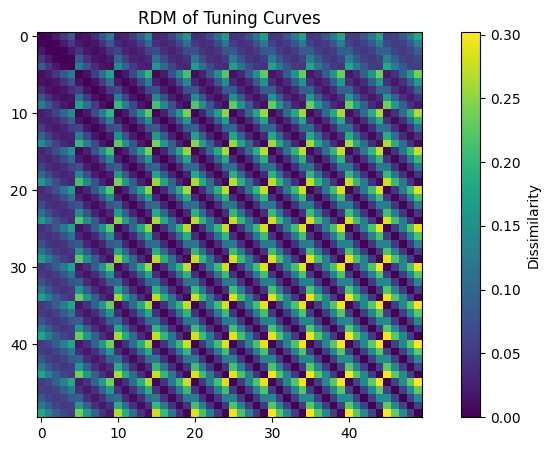

In [116]:
# Compute the RDM Matrix:
rdm = compute_RDM(curves)
plot_rdm(rdm)

## Generating Larger Sets of Randomised Data

In [117]:
def generate_random_curves(
        tuning_function: Callable[[np.ndarray, float], np.ndarray],  # the tuning function to use
        x: np.ndarray,  # a 1D numpy array of input values
        nCurves: int,  # the number of output curves to randomly generate
        parameters: List[Union[float, Tuple[float, float]]],  # a list of floats or 2-tuples of floats (single float = parameter held constant, tuple = range of values for that parameter)
    ) -> List[np.ndarray]:
    
    generatedCurves = []
    
    for _ in range(nCurves):
        curveParams = [n if type(n) in [float, int] else random.uniform(*n) for n in parameters]
        try:
            generatedCurves.append(tuning_function(x, *curveParams))
        except TypeError:  # will occur if the incorrect amount of parameters have been provided for the chosen tuning_function
            raise TypeError(f"Incorrect number of parameters provided for {tuning_function.__name__}!")
        except Exception as e:
            raise ValueError(f"Using parameters {str(curveParams)} with {tuning_function.__name__} resulted in the following exception:\n{str(e)}\nCheck your parameters are all valid for the chosen tuning function!")
    
    return generatedCurves



def generate_random_sigmoid_curves(x: np.ndarray, nCurves: int, parameters: List[Union[float, Tuple[float, float]]]) -> List[np.ndarray]:
    return generate_random_curves(sigmoid_tuning, x, nCurves, parameters)

def generate_random_gaussian_curves(x: np.ndarray, nCurves: int, parameters: List[Union[float, Tuple[float, float]]]) -> List[np.ndarray]:
    return generate_random_curves(gaussian_tuning_function, x, nCurves, parameters)

def generate_random_von_mises_curves(x: np.ndarray, nCurves: int, parameters: List[Union[float, Tuple[float, float]]]) -> List[np.ndarray]:
    return generate_random_curves(von_mises_tuning_function, x, nCurves, parameters)


### Example Usage

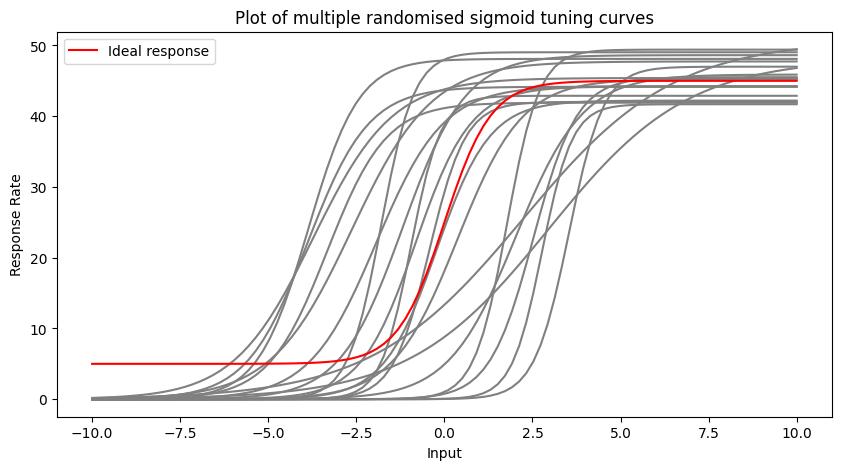

In [118]:
# testing random curve generation:
randomSigmoidCurves: List[np.ndarray] = generate_random_sigmoid_curves(
    x=np.linspace(-5, 5, 100),
    nCurves=20,
    parameters=[
        (0.5, 5),  # steepness is in range from 0.5 to 5
        (-2, 2),  # pivot is in range from -2 to 2
        (40, 50),  # max response value is in range from 40 to 50
        0  # minimum response value is fixed constant 0
    ]  # these parameters are in the same order that they are passed to the sigmoid_tuning function defined above
)

idealResponse: np.ndarray = sigmoid_tuning(np.linspace(-5, 5, 100), 3, 0, 45, 5)

fig: plt.Figure = plt.figure(figsize=(10,5))
for curve in randomSigmoidCurves:
    plt.plot(x, curve, '-', color="gray")
plt.plot(x, idealResponse, '-', color="red", label=r"Ideal response")
plt.xlabel(r"Input")
plt.ylabel(r"Response Rate")
plt.title(r"Plot of multiple randomised sigmoid tuning curves")
plt.legend()
plt.show()

### Another Example

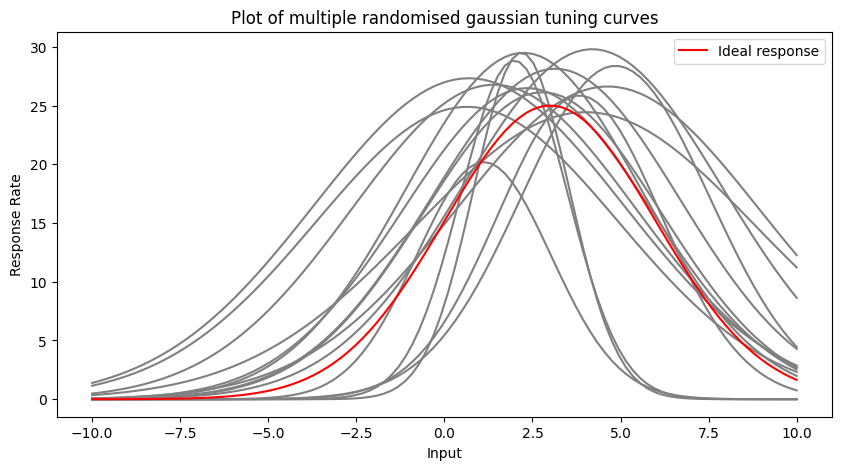

In [119]:
randomGaussianCurves: List[np.ndarray] = generate_random_gaussian_curves(
    x=np.linspace(-10, 10, 100),
    nCurves=15,
    parameters=[
        (0.5, 5),  # mu is in range from 0.5 to 5
        (1, 5),  # sigma is in range from 1 to 5
        (20, 30),  # max response value is in range from 20 to 30
        0  # minimum response value is fixed constant 0
    ]  # these parameters are in the same order that they are passed to the gaussian_tuning function
)
idealResponse: np.ndarray = gaussian_tuning_function(np.linspace(-10, 10, 100), 3, 3, 25, 0)   # mu, sigma, max, min

# plot responses:
fig: plt.Figure = plt.figure(figsize=(10,5))
for curve in randomGaussianCurves:
    plt.plot(x, curve, '-', color="gray")
plt.plot(x, idealResponse, '-', color="red", label=r"Ideal response")
plt.xlabel(r"Input")
plt.ylabel(r"Response Rate")
plt.title(r"Plot of multiple randomised gaussian tuning curves")
plt.legend()
plt.show()

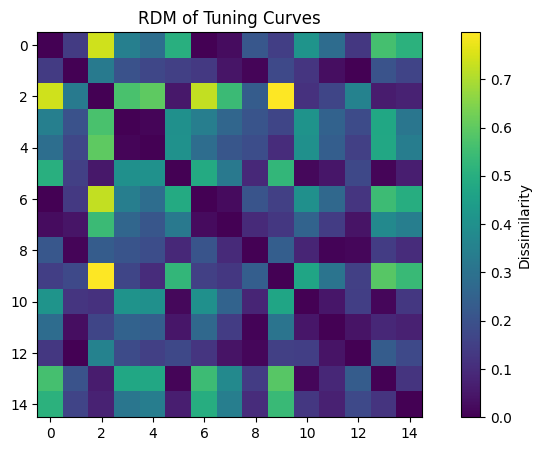

In [120]:
rdm = compute_RDM(randomGaussianCurves)
plot_rdm(rdm)

### Checking Errors are Raised Correctly:

In [121]:
# gaussian with sigma = 0 should raise ValueError with descriptive message 
try:
    testGaussian: List[np.ndarray] = generate_random_gaussian_curves(
        x=np.linspace(-10, 10, 100),
        nCurves=15,
        parameters=[
            (0.5, 5),  # mu
            0,  # sigma is the constant 0
            (20, 30),  # max response
            0  # minimum response
        ]
    )
except Exception as e:
    print(f"Error raised! Error message as follows:\n" + '\n'.join('\t' + l for l in str(e).split('\n')))
else:
    print("No exception was raised!")

Error raised! Error message as follows:
	Using parameters [2.325187573643289, 0, 24.099988821166228, 0] with gaussian_tuning_function resulted in the following exception:
	divide by zero encountered in divide
	Check your parameters are all valid for the chosen tuning function!


In [122]:
# incorrect number of parameters passed:
try:
    testGaussian: List[np.ndarray] = generate_random_gaussian_curves(
        x=np.linspace(-10, 10, 100),
        nCurves=15,
        parameters=[
            # no parameters provided
        ]
    )
except Exception as e:
    print(f"Error raised! Error message as follows:\n" + '\n'.join('\t' + l for l in str(e).split('\n')))
else:
    print("No exception was raised!")
    

Error raised! Error message as follows:
	Incorrect number of parameters provided for gaussian_tuning_function!
